# Gym Locations _Basic-Fit_ and _Fit For Free_

### Imports and version info

In [1]:
# import modules and version info
import sys
print(f'python     {sys.version_info.major}.{sys.version_info.minor}.{sys.version_info.micro}')

import pandas as pd
print(f'pandas     {pd.__version__}')

import geopandas as gpd
print(f'geopandas  {gpd.__version__}')

import matplotlib.pyplot as plt
print(f'matplotlib {sys.modules["matplotlib"].__version__}')

from shapely.geometry import Point
print(f'shapely    {sys.modules["shapely"].__version__}')

python     3.6.7
pandas     0.23.4
geopandas  0.3.0
matplotlib 3.0.1
shapely    1.6.4.post1


### Read Data

In [2]:
# Read Data
gym = pd.read_csv('../data/gym_geo.csv', sep=';')
gym.columns = ['company', 'address', 'longitude', 'latitude']

In [3]:
# Inspect Data
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 4 columns):
company      254 non-null object
address      254 non-null object
longitude    254 non-null float64
latitude     254 non-null float64
dtypes: float64(2), object(2)
memory usage: 8.0+ KB


In [4]:
# Inspect Data
pd.concat([gym.head(3), gym.tail(3)])

,company,address,longitude,latitude
0,Basic-Fit,"Molenvlietweg 18, 1432GW AALSMEER",4.777903,52.266150
1,Basic-Fit,"Terborchlaan 299, 1816MH ALKMAAR",4.714559,52.633571
2,Basic-Fit,"Oosterweezenstraat 15, 1823CN ALKMAAR",4.751788,52.635070
251,Fit For Free,"Scheglaan 12, Zoetermeer",4.488859,52.034732
252,Fit For Free,"H.A. Lorentzstraat 9, Zwijndrecht",4.630633,51.818347
253,Fit For Free,"Ceintuurbaan 34A, Zwolle",6.118634,52.521736


### Read Shapefile

In [5]:
# Read Shapefile
gemeenten = gpd.read_file('../shapefiles/2018-Imergis_gemeentegrenzen_kustlijn.dbf')

In [6]:
# Inspect Shapefile
gemeenten.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 4 columns):
id            380 non-null int64
code          380 non-null object
gemeentena    380 non-null object
geometry      380 non-null object
dtypes: int64(1), object(3)
memory usage: 12.0+ KB


In [7]:
# Inspect Shapefile
gemeenten.head()

,id,code,gemeentena,geometry
0,1,0584,Oud-Beijerland,"POLYGON ((86155.55100000001 425626.193, 86155...."
1,18,0160,Hardenberg,"POLYGON ((235753.945 520891.056, 235788.817 52..."
2,19,0327,Leusden,"POLYGON ((156842.831 462252.598, 156843.065 46..."
3,20,1931,Krimpenerwaard,"POLYGON ((104334.072 443036.486, 104342.974 44..."
4,21,1701,Westerveld,"POLYGON ((207869.464 536733.644, 207862.002 53..."


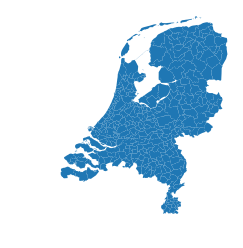

In [8]:
# Plot Shapefile
gemeenten.plot()
plt.axis('off')
plt.show()

In [9]:
# Inspect Coordinate Reference System of Shapefile
gemeenten.crs

{'proj': 'sterea',
 'lat_0': 52.15616055555555,
 'lon_0': 5.38763888888889,
 'k': 0.9999079,
 'x_0': 155000,
 'y_0': 463000,
 'ellps': 'bessel',
 'units': 'm',
 'no_defs': True}

### Changing the Coordinate Reference System of the Data

##### Step 1: Create a Point geometry column

In [10]:
# Create a Point geometry column
gym['geometry'] = gym.apply(lambda g: Point((g.longitude, g.latitude)), axis=1)

In [11]:
# Inspect Geometry
gym.head()

,company,address,longitude,latitude,geometry
0,Basic-Fit,"Molenvlietweg 18, 1432GW AALSMEER",4.777903,52.266150,POINT (4.7779031 52.26614960000001)
1,Basic-Fit,"Terborchlaan 299, 1816MH ALKMAAR",4.714559,52.633571,POINT (4.7145587 52.6335706)
2,Basic-Fit,"Oosterweezenstraat 15, 1823CN ALKMAAR",4.751788,52.635070,POINT (4.751787999999999 52.6350701)
3,Basic-Fit,"Groenplein 2, 7604BG ALMELO",6.628310,52.359735,POINT (6.6283098 52.3597349)
4,Basic-Fit,"Stadionlaan 34, 7606JZ ALMELO",6.650678,52.338138,POINT (6.6506776 52.3381375)


In [12]:
# Drop longitude and latitude columns
gym.drop(['longitude', 'latitude'], axis=1, inplace=True)

In [13]:
# Inspect Dataframe
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 3 columns):
company     254 non-null object
address     254 non-null object
geometry    254 non-null object
dtypes: object(3)
memory usage: 6.0+ KB


##### Step 2: Create a GeoDataFrame from a DataFrame

In [14]:
# Specify the Coordinate Reference System
gym_crs = {'init': 'epsg:4326'}

In [15]:
# Create a GeoDataFrame from a DataFrame
gym_geo = gpd.GeoDataFrame(gym, crs=gym_crs, geometry=gym.geometry)

In [16]:
# Inspect GeoDataFrame
type(gym_geo)

geopandas.geodataframe.GeoDataFrame

In [17]:
# Inspect Coordinate Reference System
gym_geo.crs

{'init': 'epsg:4326'}

##### Step 3: Change to Coordinate Reference System from Shapefile

In [18]:
# Changing from one CRS to another
gym_geo.geometry = gym_geo.geometry.to_crs(gemeenten.crs)

In [19]:
# Inspect GeoDataFrame
gym_geo.head()

,company,address,geometry
0,Basic-Fit,"Molenvlietweg 18, 1432GW AALSMEER",POINT (113382.5779387067 475411.1073226061)
1,Basic-Fit,"Terborchlaan 299, 1816MH ALKMAAR",POINT (109439.0620798705 516325.0609048211)
2,Basic-Fit,"Oosterweezenstraat 15, 1823CN ALKMAAR",POINT (111960.5409817227 516469.082724638)
3,Basic-Fit,"Groenplein 2, 7604BG ALMELO",POINT (239501.3882215935 486371.0139597536)
4,Basic-Fit,"Stadionlaan 34, 7606JZ ALMELO",POINT (241066.6212142036 483994.8540332345)


### Plot Geometry Point Data

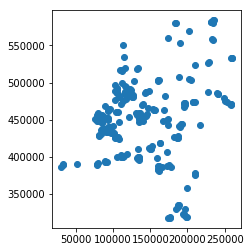

In [20]:
# Just the Geometry Points
gym_geo.geometry.plot()
plt.show()

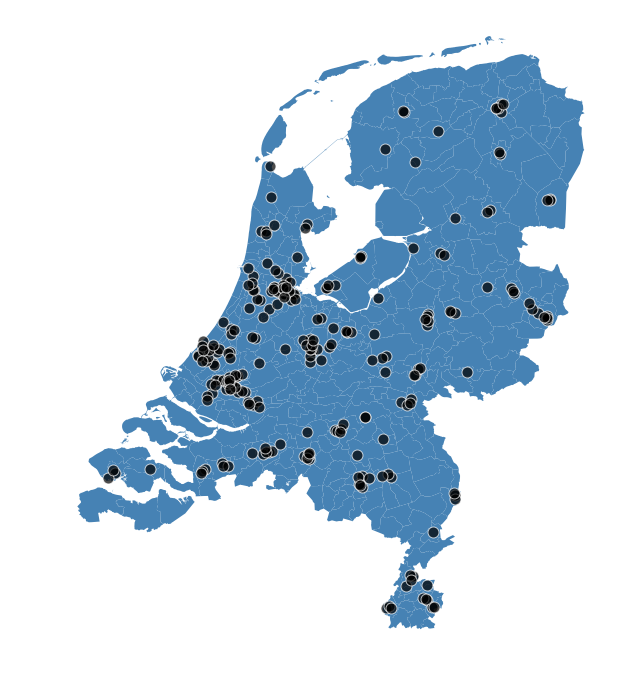

In [21]:
# Basic Point Plot
f, ax = plt.subplots(1, figsize=(10, 12))
ax = gemeenten.plot(ax=ax, color='steelblue')
gym_geo.geometry.plot(ax=ax, c='black', markersize=120, edgecolor = 'white', alpha=0.7)
plt.axis('off')
plt.show()

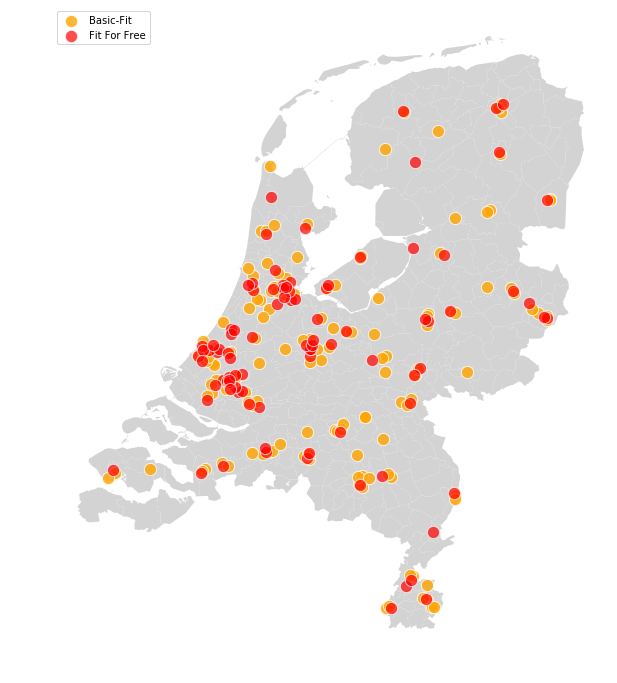

In [22]:
# Plot Geometry Point in Separate Colors
gym_geo_bft = gym_geo.loc[gym_geo.company == 'Basic-Fit']
gym_geo_fff = gym_geo.loc[gym_geo.company == 'Fit For Free']

f, ax = plt.subplots(1, figsize=(10, 12))
ax = gemeenten.plot(ax=ax, color='lightgrey')
gym_geo_bft.geometry.plot(ax=ax, label='Basic-Fit', c='orange', edgecolor = 'white', markersize=150, alpha=0.8)
gym_geo_fff.geometry.plot(ax=ax, label='Fit For Free', c='red', edgecolor = 'white', markersize=150, alpha=0.7)
ax.legend(loc='upper left')
plt.axis('off')
plt.show()

### Spatial Joins

In [23]:
# Utrecht (municipality)
utrecht = gemeenten.loc[gemeenten['gemeentena'] == 'Utrecht']
utrecht

,id,code,gemeentena,geometry
152,96,0344,Utrecht,"POLYGON ((130717.374 458786.393, 130724.302 45..."


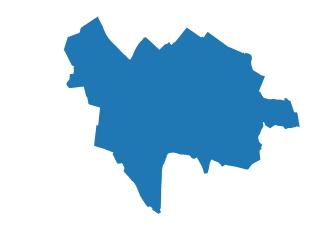

In [24]:
# Plot Shape
utrecht.plot()
plt.axis('off')
plt.show()

In [25]:
# Inspect Geospatial DataFrame
gym_geo.shape

(254, 3)

In [26]:
# Spatially join gym_geo and utrecht
gpd.sjoin(gym_geo, utrecht, op = 'intersects')

,company,address,geometry,index_right,id,code,gemeentena
143,Basic-Fit,"Europaplein 705, 3526WP UTRECHT",POINT (135907.2824315925 453148.3899281936),152,96,0344,Utrecht
144,Basic-Fit,"Herculesplein 375-77, 3584AA UTRECHT",POINT (138277.8797640881 454424.0809255632),152,96,0344,Utrecht
145,Basic-Fit,"Franciscusdreef 80, 3565AD UTRECHT",POINT (134876.1983736039 459662.0048235982),152,96,0344,Utrecht
146,Basic-Fit,"Zonnebaan 22, 3542EE UTRECHT",POINT (131247.2927189553 458944.933724404),152,96,0344,Utrecht
240,Fit For Free,"Grebbeberglaan 9A, Utrecht",POINT (135256.6840697954 454552.6841628316),152,96,0344,Utrecht
241,Fit For Free,"Beneluxlaan 21-23, Utrecht",POINT (134763.4091076953 454485.2032683869),152,96,0344,Utrecht
242,Fit For Free,"Dirck Hoetweg 5, Utrecht",POINT (132529.2035140216 456631.3010936379),152,96,0344,Utrecht
243,Fit For Free,"Westerdijk 2a, Utrecht",POINT (136046.4910305175 456678.6495309474),152,96,0344,Utrecht
244,Fit For Free,"Schooneggendreef 27L, Utrecht",POINT (136562.0786742598 459125.0674035673),152,96,0344,Utrecht


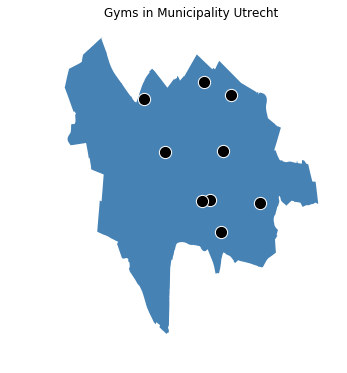

In [27]:
# Plot Intersect
f, ax = plt.subplots(1, figsize=(5, 6))
ax = utrecht.plot(ax=ax, color='steelblue')
gpd.sjoin(gym_geo, utrecht, op = 'intersects').geometry.plot(ax=ax, c='black', edgecolor = 'white', markersize=150)
plt.title('Gyms in Municipality Utrecht')
plt.axis('off')
plt.show()

In [28]:
# Check DataFrame (not Geospatial DataFrame)
gym[gym.address.str.upper().str.endswith('UTRECHT')]

,company,address,geometry
index_left,,,
143,Basic-Fit,"Europaplein 705, 3526WP UTRECHT",POINT (135907.2824315925 453148.3899281936)
144,Basic-Fit,"Herculesplein 375-77, 3584AA UTRECHT",POINT (138277.8797640881 454424.0809255632)
145,Basic-Fit,"Franciscusdreef 80, 3565AD UTRECHT",POINT (134876.1983736039 459662.0048235982)
146,Basic-Fit,"Zonnebaan 22, 3542EE UTRECHT",POINT (131247.2927189553 458944.933724404)
240,Fit For Free,"Grebbeberglaan 9A, Utrecht",POINT (135256.6840697954 454552.6841628316)
241,Fit For Free,"Beneluxlaan 21-23, Utrecht",POINT (134763.4091076953 454485.2032683869)
242,Fit For Free,"Dirck Hoetweg 5, Utrecht",POINT (132529.2035140216 456631.3010936379)
243,Fit For Free,"Westerdijk 2a, Utrecht",POINT (136046.4910305175 456678.6495309474)
244,Fit For Free,"Schooneggendreef 27L, Utrecht",POINT (136562.0786742598 459125.0674035673)


In [29]:
# Validate Row Counts
gpd.sjoin(gym_geo, utrecht, op = 'intersects').shape[0] == gym[gym.address.str.upper().str.endswith('UTRECHT')].shape[0]

True

### Aggregates

In [30]:
# Groupby gemeentenaam (municipality)
gemeente_grouped = gpd.sjoin(gym_geo, gemeenten, op = 'intersects')[['id', 'gemeentena']].groupby('gemeentena')

In [31]:
# Aggregate
gemeente_count = gemeente_grouped.agg('count').sort_values(by='id', ascending=False)
gemeente_count.columns=['aantal']

In [32]:
# Inspect
gemeente_count.head(7)

,aantal
gemeentena,
Amsterdam,23
Rotterdam,18
's-Gravenhage,12
Utrecht,9
Tilburg,6
Groningen,6
's-Hertogenbosch,5


In [33]:
# Inspect
gemeente_count.tail(7)

,aantal
gemeentena,
Oosterhout,1
Papendrecht,1
Purmerend,1
Rijswijk,1
Roermond,1
Kampen,1
Katwijk,1


In [34]:
# Geopandas Merge
gemeenten_aantal = gemeenten.merge(gemeente_count, on='gemeentena')
gemeenten_aantal.head()

,id,code,gemeentena,geometry,aantal
0,3,0289,Wageningen,"POLYGON ((174798.828 444769.583, 174799.141 44...",1
1,5,0268,Nijmegen,"POLYGON ((185201.848 430942.215, 185193.138 43...",4
2,33,0361,Alkmaar,"POLYGON ((112259.795 511741.839, 112232.451 51...",3
3,12,1783,Westland,"POLYGON ((72941.17230867562 452927.4620255152,...",2
4,28,0632,Woerden,"POLYGON ((116441.618 457612.094, 116447.764 45...",1


In [35]:
# Add gemeenten with zero gyms
gemeenten_zero = gemeenten.loc[~gemeenten.gemeentena.isin(gemeenten_aantal.gemeentena.values),:].copy()
gemeenten_zero['aantal'] = 0
gemeenten_all = gpd.GeoDataFrame(pd.concat([gemeenten_aantal, gemeenten_zero], ignore_index=True))

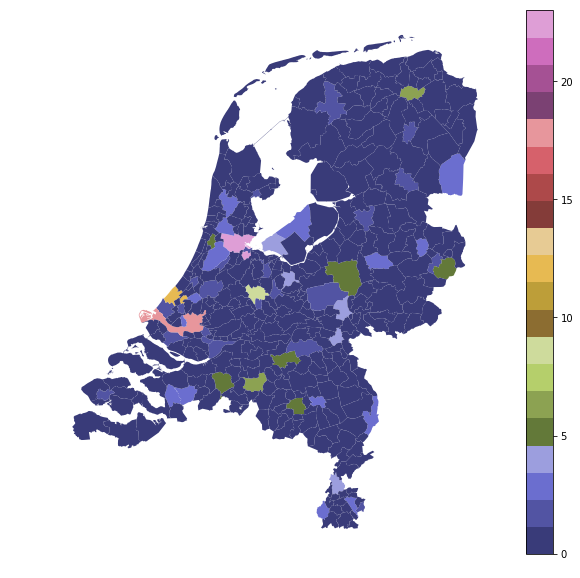

In [36]:
# Number of gyms per municipality
f, ax = plt.subplots(1, figsize=(10, 10))
ax = gemeenten_all.plot(ax=ax, column='aantal', cmap='tab20b', legend=True)
plt.axis('off')
plt.show()

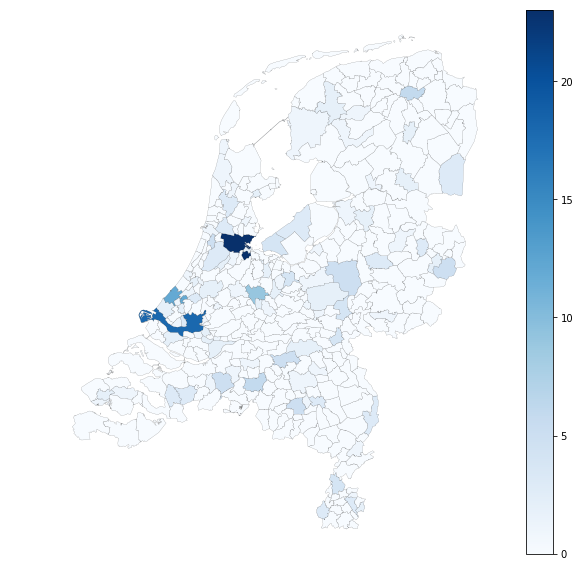

In [37]:
# Number of gyms per municipality
f, ax = plt.subplots(1, figsize=(10, 10))
ax = gemeenten_all.plot(ax=ax, column='aantal', cmap='Blues', legend=True, edgecolor='black', linewidth=0.1)
plt.axis('off')
plt.show()

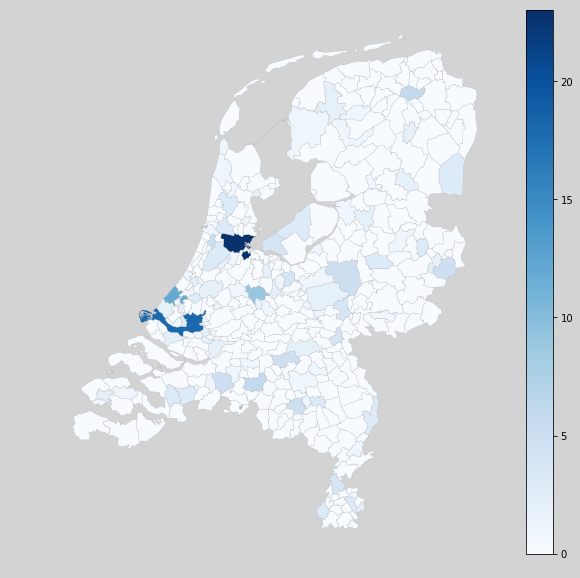

In [38]:
# Number of gyms per municipality
f, ax = plt.subplots(1, figsize=(10, 10), facecolor='lightgrey')
ax = gemeenten_all.plot(ax=ax, column='aantal', cmap='Blues', legend=True, edgecolor='darkgrey', linewidth=0.2)
plt.axis('off')
plt.show()

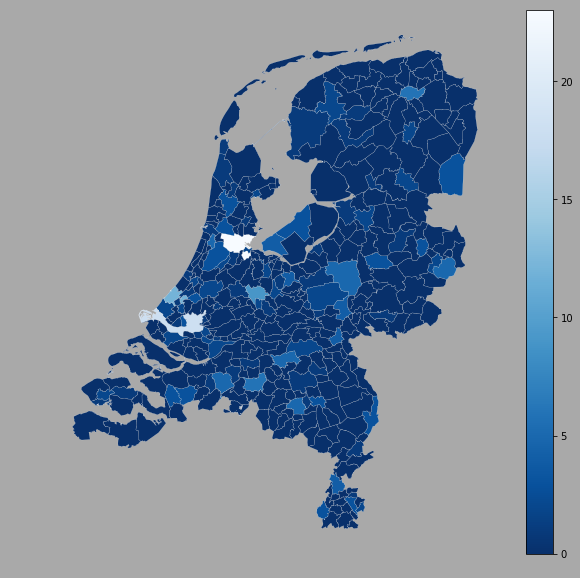

In [39]:
# Number of gyms per municipality
f, ax = plt.subplots(1, figsize=(10, 10), facecolor='darkgrey')
ax = gemeenten_all.plot(ax=ax, column='aantal', cmap='Blues_r', legend=True, edgecolor='white', linewidth=0.15)
plt.axis('off')
plt.show()

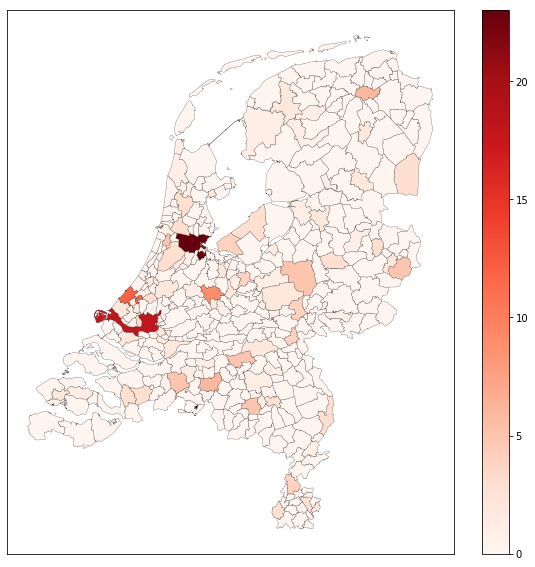

In [40]:
# Number of gyms per municipality
f, ax = plt.subplots(1, figsize=(10, 10))
ax = gemeenten_all.plot(ax=ax, column='aantal', cmap='Reds', legend=True, edgecolor='black', linewidth=0.2)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
plt.show()

### Transform latitude and longitude to CRS from Shapefile with `pyproj` (only for plotting coordinates)

In [41]:
# Imports and version info
from pyproj import Proj, transform # conda install -c conda-forge pyproj
print(f'pyproj     {sys.modules["pyproj"].__version__}')

pyproj     1.9.5.1


In [42]:
# Read Data
gym = pd.read_csv('../data/gym_geo.csv', sep=';')
gym.columns = ['company', 'address', 'longitude', 'latitude']

In [43]:
# Inspect Data
gym.head()

,company,address,longitude,latitude
0,Basic-Fit,"Molenvlietweg 18, 1432GW AALSMEER",4.777903,52.266150
1,Basic-Fit,"Terborchlaan 299, 1816MH ALKMAAR",4.714559,52.633571
2,Basic-Fit,"Oosterweezenstraat 15, 1823CN ALKMAAR",4.751788,52.635070
3,Basic-Fit,"Groenplein 2, 7604BG ALMELO",6.628310,52.359735
4,Basic-Fit,"Stadionlaan 34, 7606JZ ALMELO",6.650678,52.338138


In [44]:
# Transform
p1 = Proj(proj='lonlat', datum='WGS84')
p2 = Proj(gemeenten.crs)

x_list = list()
y_list = list()

for index, row in gym.iterrows():
    x, y = transform(p1, p2, row.longitude, row.latitude)
    x_list.append(x)
    y_list.append(y)

gym['x'] = x_list
gym['y'] = y_list

In [45]:
# Inspect Data
gym.head()

,company,address,longitude,latitude,x,y
0,Basic-Fit,"Molenvlietweg 18, 1432GW AALSMEER",4.777903,52.266150,113382.577939,475411.107323
1,Basic-Fit,"Terborchlaan 299, 1816MH ALKMAAR",4.714559,52.633571,109439.062080,516325.060905
2,Basic-Fit,"Oosterweezenstraat 15, 1823CN ALKMAAR",4.751788,52.635070,111960.540982,516469.082725
3,Basic-Fit,"Groenplein 2, 7604BG ALMELO",6.628310,52.359735,239501.388222,486371.013960
4,Basic-Fit,"Stadionlaan 34, 7606JZ ALMELO",6.650678,52.338138,241066.621214,483994.854033


In [46]:
# Inspect Data
gym.info() # N.B. It is stil a Pandas DataFrame, not a GeoPandas GeoDataFrame!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 6 columns):
company      254 non-null object
address      254 non-null object
longitude    254 non-null float64
latitude     254 non-null float64
x            254 non-null float64
y            254 non-null float64
dtypes: float64(4), object(2)
memory usage: 12.0+ KB


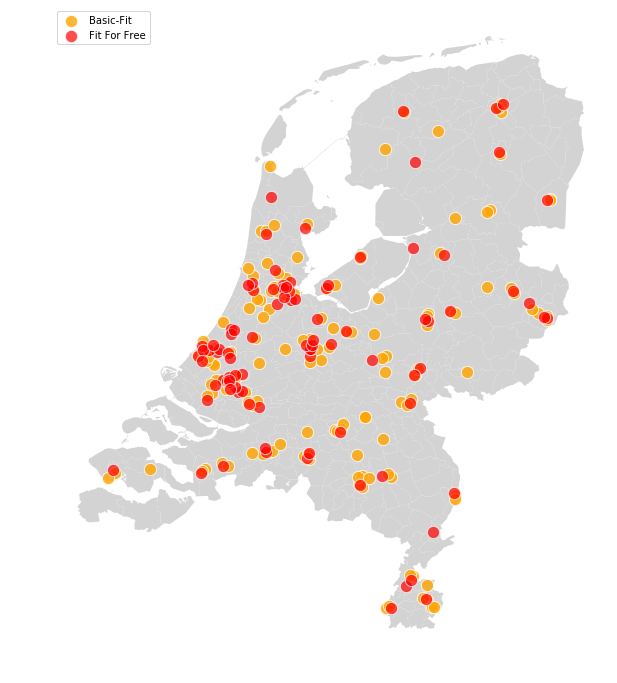

In [47]:
# Formated Plot
basicfit = gym[gym.company=='Basic-Fit']
fitforfree = gym[gym.company=='Fit For Free']

f, ax = plt.subplots(1, figsize=(10, 12))
ax = gemeenten.plot(ax=ax, color='lightgrey')
plt.scatter(x=basicfit.x, y=basicfit.y, c='Orange', edgecolor = 'white', s=150, alpha=0.8, label='Basic-Fit')
plt.scatter(x=fitforfree.x, y=fitforfree.y, c='red', edgecolor = 'white', s=150, alpha=0.7, label='Fit For Free')
ax.legend(loc='upper left')
plt.axis('off')
plt.show()